In [431]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import itertools # advanced tools
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

In [432]:
# IMPORTING DATA
df = pd.read_csv('transactions.csv')
#print(df.head())

In [433]:
# View the dataset
print(df.shape)
df.head()

(348676, 12)


,user_id,card_id,time,transaction_value,transaction_type,city,state,zip_code,MCC,data_quality,is_fraud,date
0,1,1,14:05,$488.00,Chip Transaction,Rome,Italy,NaN,3684,NaN,Yes,2019-5-11
1,1,1,14:53,$14.22,Chip Transaction,Rome,Italy,NaN,5311,NaN,Yes,2019-5-11
2,1,1,14:26,$13.79,Chip Transaction,Rome,Italy,NaN,4214,NaN,Yes,2019-5-16
3,1,1,15:12,$12.27,Chip Transaction,Rome,Italy,NaN,5812,NaN,Yes,2019-5-16
4,1,1,13:23,$38.63,Chip Transaction,Rome,Italy,NaN,5921,NaN,Yes,2019-5-17


In [434]:
# Fill the empty value (NaN) with the mode value of the particular Column in the dataset.
df.fillna(df.mode().iloc[0])

,user_id,card_id,time,transaction_value,transaction_type,city,state,zip_code,MCC,data_quality,is_fraud,date
0,1,1,14:05,$488.00,Chip Transaction,Rome,Italy,98516.0,3684,Insufficient Balance,Yes,2019-5-11
1,1,1,14:53,$14.22,Chip Transaction,Rome,Italy,98516.0,5311,Insufficient Balance,Yes,2019-5-11
2,1,1,14:26,$13.79,Chip Transaction,Rome,Italy,98516.0,4214,Insufficient Balance,Yes,2019-5-16
3,1,1,15:12,$12.27,Chip Transaction,Rome,Italy,98516.0,5812,Insufficient Balance,Yes,2019-5-16
4,1,1,13:23,$38.63,Chip Transaction,Rome,Italy,98516.0,5921,Insufficient Balance,Yes,2019-5-17
...,...,...,...,...,...,...,...,...,...,...,...,...
348671,122,0,15:18,$25.80,Chip Transaction,Andover,KS,67002.0,9402,Insufficient Balance,No,2019-2-28
348672,536,3,01:03,$15.05,Chip Transaction,Omaha,NE,68136.0,5310,Insufficient Balance,No,2019-12-26
348673,1107,2,14:04,$93.83,Chip Transaction,Montandon,PA,17850.0,5411,Insufficient Balance,No,2019-2-22
348674,330,0,21:05,$16.74,Swipe Transaction,Watertown,MA,2472.0,7832,Insufficient Balance,No,2018-12-3


In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348676 entries, 0 to 348675
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            348676 non-null  int64  
 1   card_id            348676 non-null  int64  
 2   time               348676 non-null  object 
 3   transaction_value  348676 non-null  object 
 4   transaction_type   348676 non-null  object 
 5   city               348676 non-null  object 
 6   state              305422 non-null  object 
 7   zip_code           298909 non-null  float64
 8   MCC                348676 non-null  int64  
 9   data_quality       5576 non-null    object 
 10  is_fraud           348676 non-null  object 
 11  date               348676 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 31.9+ MB


In [438]:
#Exploratory Data Analysis (EDA)

cases = len(df)
nonfraud_count = len(df[df.is_fraud == 'No'])
fraud_count = len(df[df.is_fraud == 'Yes'])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------'))
print(cl('Total number of cases are {}'.format(cases)))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count)))
print(cl('Number of fraud cases are {}'.format(fraud_count)))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage)))
print(cl('--------------------------------------------'))

CASE COUNT
--------------------------------------------
Total number of cases are 348676
Number of Non-fraud cases are 344098
Number of fraud cases are 4578
Percentage of fraud cases is 1.33
--------------------------------------------


In [439]:
df.describe()

,user_id,card_id,zip_code,MCC
count,348676.000000,348676.000000,298909.000000,348676.000000
mean,1006.669160,1.279337,51012.018019,5556.360409
std,570.803146,1.367097,29408.200623,881.906273
min,0.000000,0.000000,1012.000000,1711.000000
25%,517.000000,0.000000,28306.000000,5300.000000
50%,1012.000000,1.000000,47348.000000,5499.000000
75%,1487.000000,2.000000,77564.000000,5812.000000
max,1999.000000,8.000000,99708.000000,9402.000000


In [440]:
# check for null values
df.isnull().shape[0]
print("Non-missing values: " + str(df.isnull().shape[0]))
print("Missing values: " + str(df.shape[0] - df.isnull().shape[0]))

Non-missing values: 348676
Missing values: 0


In [443]:
# Data Processing and EDA

nonfraud_cases = df[df.is_fraud == 'No']
fraud_cases = df[df.is_fraud == 'Yes']

print(cl('CASE AMOUNT STATISTICS'))
print(cl('--------------------------------------------'))
print(cl('NON-FRAUD CASE AMOUNT STATS'))
print(nonfraud_cases.transaction_value.describe())
print(cl('--------------------------------------------'))
print(cl('FRAUD CASE AMOUNT STATS'))
print(fraud_cases.transaction_value.describe())
print(cl('--------------------------------------------'))

CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count     344098
unique     24572
top       $80.00
freq        3398
Name: transaction_value, dtype: object
--------------------------------------------
FRAUD CASE AMOUNT STATS
count       4578
unique      3649
top       $76.00
freq           9
Name: transaction_value, dtype: object
--------------------------------------------


In [444]:
df['time'].describe()

count     348676
unique      1440
top        13:05
freq         509
Name: time, dtype: object

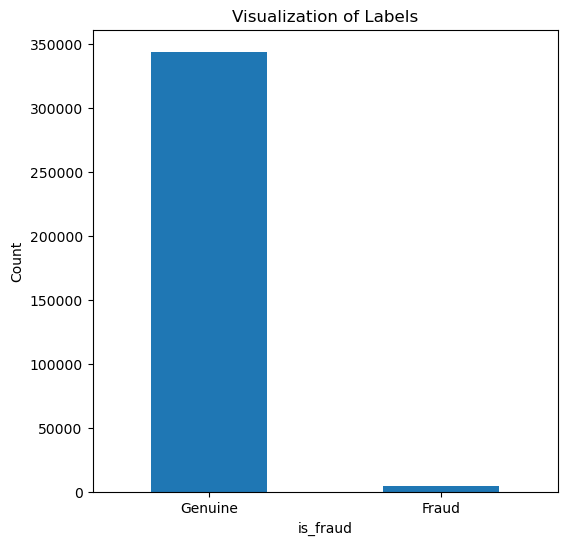

In [445]:
import matplotlib.pyplot as plt

labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['is_fraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [446]:
# Remove the special character '$' associalted with 'transaction_value' column.
df['transaction_value'] = df['transaction_value'].str.replace('$', '')

#df['transaction_value'] = df['transaction_value'].map(lambda x: float(x))

/tmp/ipykernel_5606/3134787850.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['transaction_value'] = df['transaction_value'].str.replace('$', '')


In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348676 entries, 0 to 348675
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            348676 non-null  int64  
 1   card_id            348676 non-null  int64  
 2   time               348676 non-null  object 
 3   transaction_value  348676 non-null  object 
 4   transaction_type   348676 non-null  object 
 5   city               348676 non-null  object 
 6   state              305422 non-null  object 
 7   zip_code           298909 non-null  float64
 8   MCC                348676 non-null  int64  
 9   data_quality       5576 non-null    object 
 10  is_fraud           348676 non-null  object 
 11  date               348676 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 31.9+ MB


In [448]:
# Convert object data type to float data type.
df['transaction_value'] = df['transaction_value'].map(lambda x: float(x))

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348676 entries, 0 to 348675
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            348676 non-null  int64  
 1   card_id            348676 non-null  int64  
 2   time               348676 non-null  object 
 3   transaction_value  348676 non-null  float64
 4   transaction_type   348676 non-null  object 
 5   city               348676 non-null  object 
 6   state              305422 non-null  object 
 7   zip_code           298909 non-null  float64
 8   MCC                348676 non-null  int64  
 9   data_quality       5576 non-null    object 
 10  is_fraud           348676 non-null  object 
 11  date               348676 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 31.9+ MB


In [450]:
# Remove the special character ':' associalted with 'time' column.
df['time'] = df['time'].str.replace(':', '.')

In [451]:
# Convert object data type to float data type.
df['time'] = df['time'].map(lambda x: float(x))

In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348676 entries, 0 to 348675
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            348676 non-null  int64  
 1   card_id            348676 non-null  int64  
 2   time               348676 non-null  float64
 3   transaction_value  348676 non-null  float64
 4   transaction_type   348676 non-null  object 
 5   city               348676 non-null  object 
 6   state              305422 non-null  object 
 7   zip_code           298909 non-null  float64
 8   MCC                348676 non-null  int64  
 9   data_quality       5576 non-null    object 
 10  is_fraud           348676 non-null  object 
 11  date               348676 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 31.9+ MB


In [456]:
# On observing the statistics, it is seen that the values in the ‘transaction_value’ variable are varying enormously  
# when compared to the rest of the variables. To reduce its wide range of values, we can normalize it using the 
#‘StandardScaler’ method.

sc = StandardScaler()
amount = df['transaction_value'].values

df['transaction_value'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(df['transaction_value'].head(10), attrs = ['bold']))

0    5.422890
1   -0.353153
2   -0.358395
3   -0.376926
4   -0.055561
5    0.151084
6    0.246177
7    1.060684
8   -0.058852
9    0.074643
Name: transaction_value, dtype: float64


In [457]:
# Replacing 'Yes' and 'No' in 'is_fraud' column with '1' and '0' respectively. Did this because 
# the text data needed to convert to numerical data for further processing.

df['is_fraud'] = df['is_fraud'].str.replace('No', '0')
df['is_fraud'] = df['is_fraud'].str.replace('Yes', '1')
df['is_fraud'] = df['is_fraud'].astype('int')
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348676 entries, 0 to 348675
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            348676 non-null  int64  
 1   card_id            348676 non-null  int64  
 2   time               348676 non-null  float64
 3   transaction_value  348676 non-null  float64
 4   transaction_type   348676 non-null  object 
 5   city               348676 non-null  object 
 6   state              305422 non-null  object 
 7   zip_code           298909 non-null  float64
 8   MCC                348676 non-null  int64  
 9   data_quality       5576 non-null    object 
 10  is_fraud           348676 non-null  int64  
 11  date               348676 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 31.9+ MB
(348676, 12)


In [458]:
df.head()

,user_id,card_id,time,transaction_value,transaction_type,city,state,zip_code,MCC,data_quality,is_fraud,date
0,1,1,14.05,5.422890,Chip Transaction,Rome,Italy,NaN,3684,NaN,1,2019-5-11
1,1,1,14.53,-0.353153,Chip Transaction,Rome,Italy,NaN,5311,NaN,1,2019-5-11
2,1,1,14.26,-0.358395,Chip Transaction,Rome,Italy,NaN,4214,NaN,1,2019-5-16
3,1,1,15.12,-0.376926,Chip Transaction,Rome,Italy,NaN,5812,NaN,1,2019-5-16
4,1,1,13.23,-0.055561,Chip Transaction,Rome,Italy,NaN,5921,NaN,1,2019-5-17


/tmp/ipykernel_5606/1040418013.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_features.corr()


<AxesSubplot: >

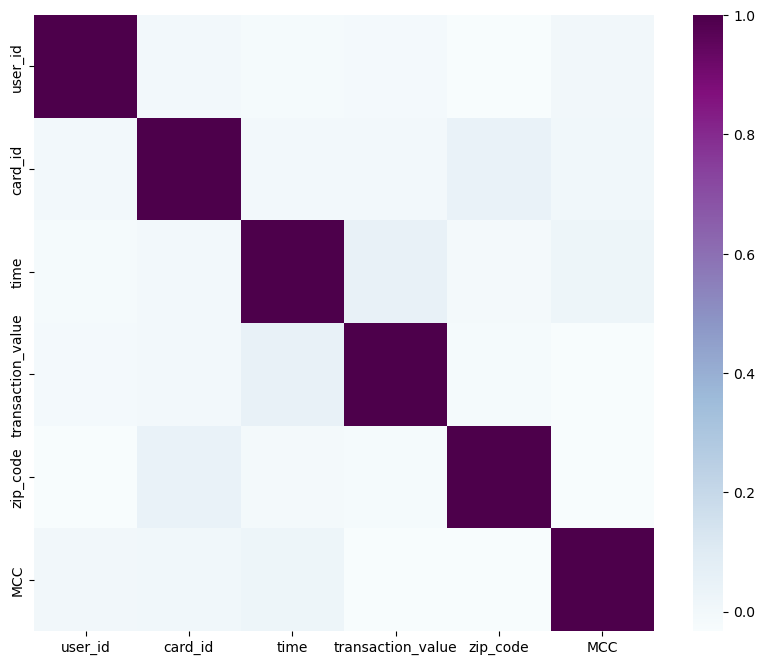

In [459]:
# plotting the heatmap to to visualize the strength of correlation among variables.

df_features=df.drop(columns='is_fraud')
plt.figure(figsize=(10,8))
corr=df_features.corr()
sns.heatmap(corr,cmap='BuPu')
#sns.heatmap(corr,cmap='RdBu')

In [460]:
# Fill the empty value (NaN) with the mode value of the particular Column in the dataset.
df=df.fillna(df.mode().iloc[0])

In [461]:
# Initialize the label encoder to encode the string values so that the string data is converted to numerical data.

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df['transaction_type_encoded'] = labelencoder.fit_transform(df['transaction_type'])
df['city_encoded'] = labelencoder.fit_transform(df['city'])
df['state_encoded'] =labelencoder.fit_transform(df['state'])
df['data_quality_encoded'] = labelencoder.fit_transform(df['data_quality'])
df['date_encoded'] = labelencoder.fit_transform(df['date'])

In [462]:
X = df[['transaction_type_encoded', 'city_encoded', 'state_encoded', 'data_quality_encoded', 
        'date_encoded', 'user_id', 'card_id', 'time', 'transaction_value', 'zip_code', 'MCC', 'is_fraud']]
input_features = ['transaction_type_encoded', 'city_encoded', 'state_encoded', 'data_quality_encoded', 
        'date_encoded', 'user_id', 'card_id', 'time', 'transaction_value', 'zip_code']

In [463]:
# Splitting the training and testing dataset in the ratio 90:10.
df_train, df_test = train_test_split(X, test_size=0.1, random_state=42, stratify=X['is_fraud'])

In [464]:
# To reduce the wide range of values, we can normalize it using the ‘StandardScaler’ method.

scaler = preprocessing.StandardScaler()
scaler.fit(df_train[input_features])

df_train[input_features]=scaler.transform(df_train[input_features])
df_test[input_features]=scaler.transform(df_test[input_features])

In [465]:
# Selecting the data for training and testing.

X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

In [466]:
# Filling the enpty (Nan) values with the mean value.

y_test.fillna(y_test.mean())
y_train.fillna(y_train.mean())
X_test.fillna(X_test.mean())
X_train.fillna(X_train.mean())

,transaction_type_encoded,city_encoded,state_encoded,data_quality_encoded,date_encoded,user_id,card_id,time,transaction_value,zip_code,MCC
282027,-0.602359,-1.220401,0.059707,0.048407,-0.441676,0.995001,-0.204573,0.084435,-1.565735,-1.161425,5541
135255,-0.602359,-0.187250,-0.333184,0.048407,1.590084,0.532406,-0.936792,-0.032069,0.199101,-0.341453,5661
76393,-0.602359,0.207923,-0.857039,0.048407,1.414441,1.580255,0.527646,1.527902,0.153038,-1.185778,5814
182903,-0.602359,1.048146,-1.145159,0.048407,0.835295,-1.598336,-0.936792,1.111251,0.589726,1.032323,5812
88923,-0.602359,-0.794535,0.452598,0.048407,-0.228056,0.718145,0.527646,0.457643,-0.125299,-0.924281,5310
...,...,...,...,...,...,...,...,...,...,...,...
333591,0.703929,0.485805,-1.145159,0.048407,1.708761,-1.023596,-0.204573,-0.136726,0.089868,1.276331,4784
260372,0.703929,0.485805,-1.145159,0.048407,-0.484400,0.523645,-0.936792,-0.906838,-0.372112,1.276331,4900
68321,-0.602359,1.662007,-1.118967,0.048407,-0.849927,-0.329703,-0.936792,1.539750,0.426732,0.696919,4111
185169,-0.602359,-0.174096,1.447922,0.048407,-1.111017,-1.675435,-0.936792,-1.043089,-0.354762,-0.627774,5912


In [467]:
# MODELING

# 1. Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

# 2. K-Nearest Neighbors

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

# 3. Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

# 4. SVM 

svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

# 5. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

# 6. XGBoost

xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

/home/praveen/anaconda3/envs/notebook/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [468]:
# Accuracy score

print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.9991396122519215
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.9966731673740966
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9868934266376047
------------------------------------------------------------------------
Accuracy score of the SVM model is 0.986864747046002
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.9991396122519215
------------------------------------------------------------------------
Accuracy score of the XGBoost model is 0.9996845244923712
------------------------------------------------------------------------


In [471]:
# F1 score

print(cl('F1 SCORE'))
print(cl('------------------------------------------------------------------------'))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat))))
print(cl('------------------------------------------------------------------------'))
print(cl('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat))))
print(cl('------------------------------------------------------------------------'))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat))))
print(cl('------------------------------------------------------------------------'))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat))))
print(cl('------------------------------------------------------------------------'))
print(cl('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat))))
print(cl('------------------------------------------------------------------------'))
print(cl('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat))))
print(cl('------------------------------------------------------------------------'))

F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.966740576496674
------------------------------------------------------------------------
F1 score of the KNN model is 0.8699551569506727
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.16757741347905283
------------------------------------------------------------------------
F1 score of the SVM model is 0.0
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is 0.966740576496674
------------------------------------------------------------------------
F1 score of the XGBoost model is 0.9879253567508233
------------------------------------------------------------------------


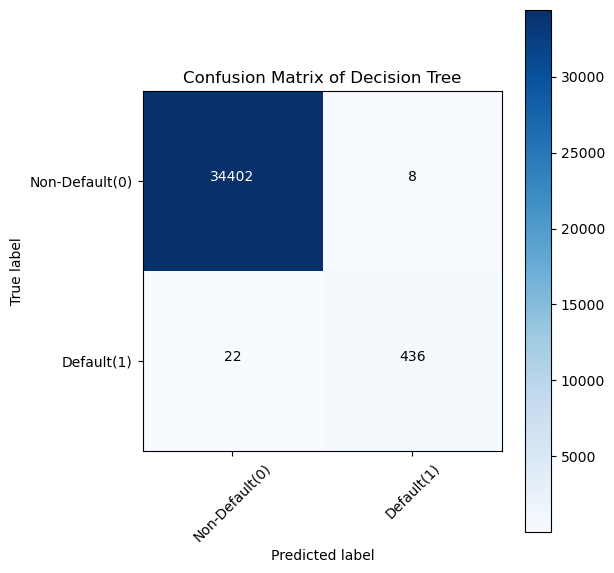

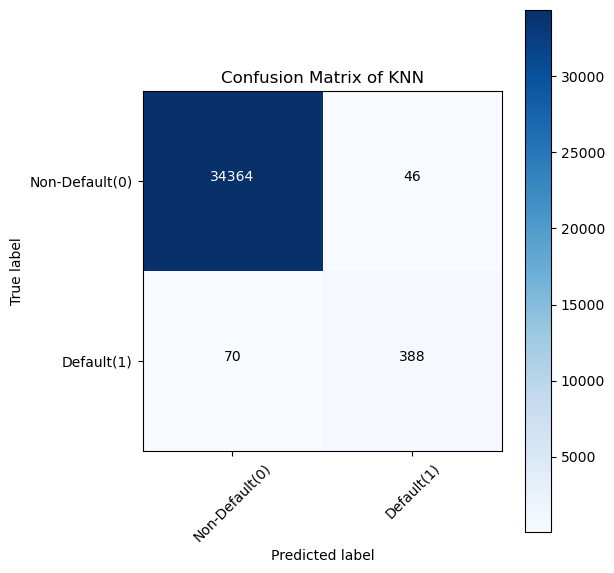

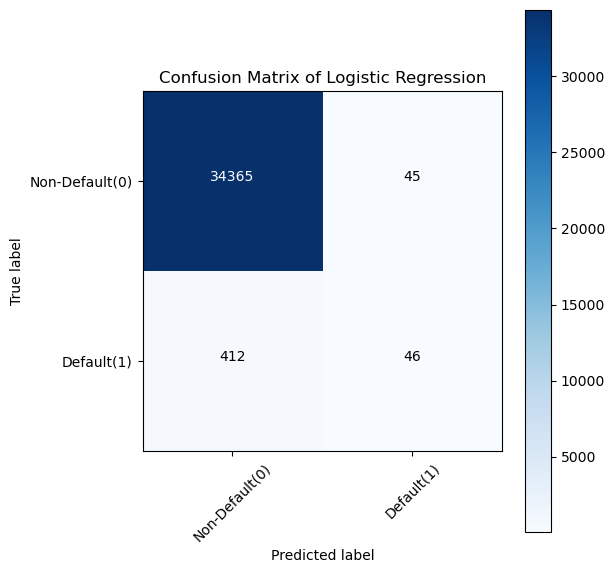

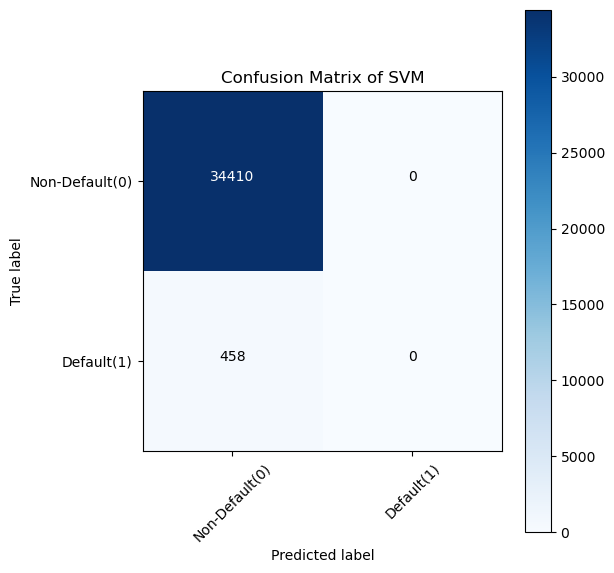

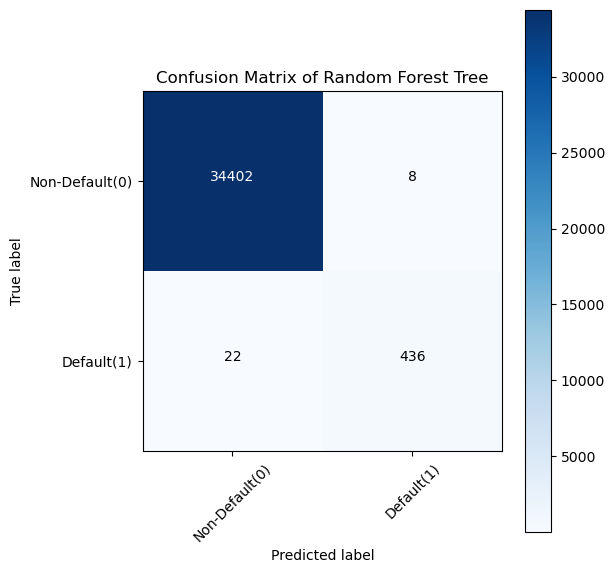

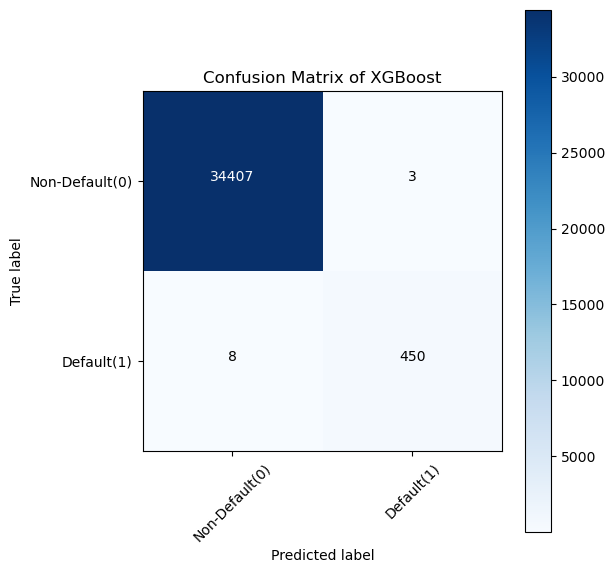

In [470]:
# Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

# 2. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

# 3. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

# 4. Support Vector Machine

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

# 5. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

# 6. XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()